<a href="https://colab.research.google.com/github/Nithesh-b/Twitter_Sentiment/blob/master/NLTKexample1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### This program is for pre-processing 

In [142]:
import numpy as np 
print('numpy: {}'.format(np.__version__)) # Printing the version of Numpy

import pandas as pd
print('pandas: {}'.format(pd.__version__)) # Printing the version of pandas

import re
import matplotlib.pyplot as plt
%matplotlib inline

numpy: 1.18.5
pandas: 1.1.2


In [143]:
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from termcolor import colored
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Data read - All Required data  are in datafolder

In [144]:
# Data read - All Required data  are in datafolder


InputdataFile = "/content/sample_data/Base_tweets_DataSetV3.xlsx"
outputfolder = "/content/sample_data/output"
MLOutfolder =  "/content/sample_data/ML"

In [145]:
tweets_df = pd.read_excel(InputdataFile)
print(tweets_df.shape)

(30256, 10)


####  Find missing values in each column

In [146]:
#% of missing values in each column
def find_missing_values_func(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [147]:
#Call the find_missing_values_func(df)
columnsWiseMissingValue = find_missing_values_func(tweets_df) 
print(columnsWiseMissingValue)

Selected dataframe has 10 columns.
There are 5 columns that have missing values.
              Missing Values  % of Total Values
Date Created           10378               34.3
Tweet_source            2230                7.4
Tweet                    101                0.3
Country                   76                0.3
Tweeted-By                33                0.1


### class column creation

#### Drop NULL Tweet-Text  rows as we use tweet text for text processing 
#### Drop Duplicate rows and duplicate tweet_id  
#### Dropping "Date Created" column from main dataframe as it has no use
#### clean Tweet-Source  and replace missing tweet-source as "OTHERS"
#### Tweet-Source - distribution - pie chart
#### Class distribution - also chart
#### Convert class  to numeric as - {'neu' : 2, 'pos' : 0, 'neg' : 1}
#### Explore Negative tweet and its catergory ( column - Tweet-Class_category-Code)
#### Country wise positive , Negative and Neutral
#### 

### SESSION-2

### Session -  1-Gr-99-Preprocessing-1.ipynb
2-Gr-99-Preprocessing-2
3-Gr-99-ML-sklearn
4-Gr-99-ML-H2o model - (Automl)  

#### This Script does 
1.
2.
3.
4. 


In [148]:

import numpy as np 
import pandas as pd 
import re
#import nltk 
import matplotlib.pyplot as plt
%matplotlib inline
# Data read - All Required data  are in datafolder


dataFolder = "/content/sample_data/"
outFolder = "/content/sample_data/"

In [149]:
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from termcolor import colored
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Read Base data

In [150]:
# Data read - All Required data  are in datafolder
dataFile = "/content/sample_data/Base_tweets_DataSetV3.xlsx"


tweets_df = pd.read_excel(dataFile)
print(tweets_df.shape)

(30256, 10)


In [151]:
print(tweets_df.head(5))

print("--------------------------------")
print(tweets_df.dtypes)

             tweet_id SourceDataBase  ...        Date Created  Country
0  neu-GG-Tweet-11945          MySQL  ... 2016-02-27 11:35:52   Canada
1  neu-GG-Tweet-11944          MySQL  ... 2016-02-27 11:35:52   Canada
2  neu-GG-Tweet-11943          MySQL  ... 2016-02-27 11:35:52   Canada
3  neu-GG-Tweet-11942          MySQL  ... 2016-02-27 11:35:52   Canada
4  neu-GG-Tweet-11941          MySQL  ... 2016-02-27 11:35:52   Canada

[5 rows x 10 columns]
--------------------------------
tweet_id                             object
SourceDataBase                       object
OS                                   object
Tweet-Class_category-Code             int64
Tweet_source                         object
Tweeted-By                           object
retweet_count                         int64
Tweet                                object
Date Created                 datetime64[ns]
Country                              object
dtype: object


### Lebel column creation

In [152]:
#  finding label from Twit ID 


# This data set has no label id 
# Extract label_id from tweet_id - First 3 character label_id
label = list(tweets_df['tweet_id'].str[:3])

tweets_df['label_id'] = pd.Series(label).values

In [153]:
display(tweets_df.head(5))


,tweet_id,SourceDataBase,OS,Tweet-Class_category-Code,Tweet_source,Tweeted-By,retweet_count,Tweet,Date Created,Country,label_id
0,neu-GG-Tweet-11945,MySQL,Windows,99,NaN,P32013,0,Just landed. My ears hurt,2016-02-27 11:35:52,Canada,neu
1,neu-GG-Tweet-11944,MySQL,Windows,99,NaN,P32012,0,ouch following the #ASOT400 in TweetDeck excee...,2016-02-27 11:35:52,Canada,neu
2,neu-GG-Tweet-11943,MySQL,Windows,99,NaN,P32011,0,@Nessiebear i really wanna see it! but no one ...,2016-02-27 11:35:52,Canada,neu
3,neu-GG-Tweet-11942,MySQL,Windows,99,NaN,P32010,0,"@TessAaaaah Ahh, this is how you reply!! I had...",2016-02-27 11:35:52,Canada,neu
4,neu-GG-Tweet-11941,MySQL,Windows,99,NaN,P32009,0,@chenez awwww. and i didn't get to be the hero...,2016-02-27 11:35:52,Canada,neu


In [154]:
tweets_df.columns

Index(['tweet_id', 'SourceDataBase', 'OS', 'Tweet-Class_category-Code',
       'Tweet_source', 'Tweeted-By', 'retweet_count', 'Tweet', 'Date Created',
       'Country', 'label_id'],
      dtype='object')

#### Finding missing values in each column

In [155]:
#% of missing values in each column
def find_missing_values_func(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [156]:
#Call the find_missing_values_func(df)
columnsWiseMissingValue = find_missing_values_func(tweets_df) 
print(columnsWiseMissingValue)

Selected dataframe has 11 columns.
There are 5 columns that have missing values.
              Missing Values  % of Total Values
Date Created           10378               34.3
Tweet_source            2230                7.4
Tweet                    101                0.3
Country                   76                0.3
Tweeted-By                33                0.1


### # Drop NULL Tweet-Text  rows as we use tweet text for text processing 

In [157]:
# Drop NULL Tweet-Text  rows as we use tweet text for text processing 
tweets_df = tweets_df.dropna(subset=["Tweet"])

### Drop Duplicate rows and tweet_id  - To be done

In [158]:
# Inpute Null Tweet_source as OTHER
column = 'Tweet_source'
tweets_df[column] = tweets_df[column].fillna("OTHER")

# Inpute Null Tweeted-By as Unknown
column = 'Tweeted-By'
tweets_df[column] = tweets_df[column].fillna("Unknown")


In [159]:
#Check missing_values again , if any
columnsWiseMissingValue = find_missing_values_func(tweets_df) 
print(columnsWiseMissingValue)

Selected dataframe has 11 columns.
There are 1 columns that have missing values.
              Missing Values  % of Total Values
Date Created           10300               34.2


In [160]:
#Dropping Date Created column from main dataframe as it has no use
tweets_df = tweets_df.drop(["Date Created"], axis=1)

In [161]:
print(tweets_df.shape)

(30155, 10)


In [162]:
tweets_df.columns

Index(['tweet_id', 'SourceDataBase', 'OS', 'Tweet-Class_category-Code',
       'Tweet_source', 'Tweeted-By', 'retweet_count', 'Tweet', 'Country',
       'label_id'],
      dtype='object')

In [163]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


In [164]:
 tweets_df["Tweet_source"].value_counts() 

S5       6668
S3       6300
S4       4570
S1       3703
S2       2930
OTHER    2149
S-5      2111
S6       1724
Name: Tweet_source, dtype: int64

##### Clean  Tweet_source column

In [165]:
# Replace(['S-5','s5'] with 'S5')
tweets_df['Tweet_source'] = tweets_df['Tweet_source'].replace(['S-5'],'S5')

In [166]:
tweets_df.columns

Index(['tweet_id', 'SourceDataBase', 'OS', 'Tweet-Class_category-Code',
       'Tweet_source', 'Tweeted-By', 'retweet_count', 'Tweet', 'Country',
       'label_id'],
      dtype='object')

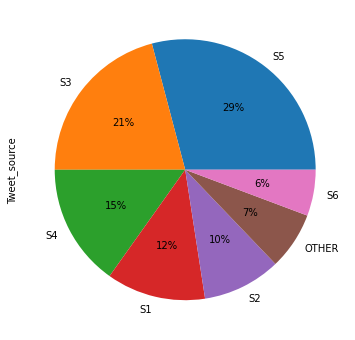

In [167]:
# Try for another way for Pie chart
tweets_df.Tweet_source.value_counts().plot(kind='pie', autopct='%1.0f%%')

## Label id distribution

In [168]:
# Check label_id 
tweets_df["label_id"].value_counts()

neg    12259
pos     9983
neu     7913
Name: label_id, dtype: int64

Text(0.5, 1.0, 'Count of tweets for each sentiment')

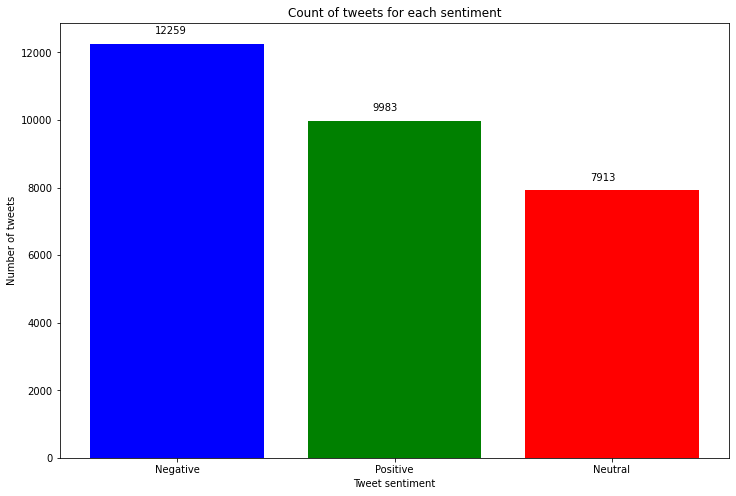

In [169]:
# Refine the graph

class_count = tweets_df['label_id'].value_counts() # Returned in descending order [4, 0]



plt.figure(figsize = (12, 8))
plt.bar(['Negative' , 'Positive' , 'Neutral'], height = class_count.values, color = ['b', 'g', 'r'])
for i, v in enumerate(class_count.values):
    plt.text(i - 0.1, v+300 , str(v))
    
plt.xlabel('Tweet sentiment')
plt.ylabel('Number of tweets')
plt.title('Count of tweets for each sentiment')

In [170]:
tweets_df.columns

Index(['tweet_id', 'SourceDataBase', 'OS', 'Tweet-Class_category-Code',
       'Tweet_source', 'Tweeted-By', 'retweet_count', 'Tweet', 'Country',
       'label_id'],
      dtype='object')

Country wise positive , Negative and Neutral - Map If possible

In [171]:
tweets_pos = tweets_df[(tweets_df.label_id.isin(["pos"]))]
tweets_neu = tweets_df[(tweets_df.label_id.isin(["neu"]))]
tweets_neg = tweets_df[(tweets_df.label_id.isin(["neg"]))]

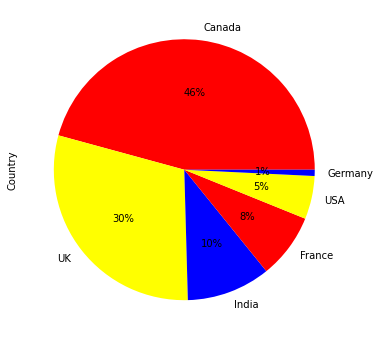

In [172]:
tweets_pos["Country"].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "blue"])

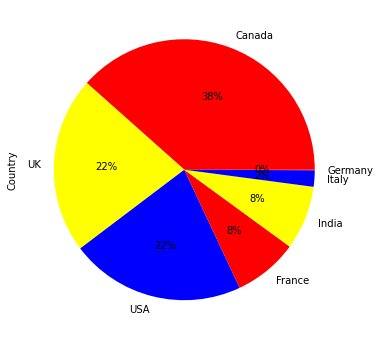

In [173]:
tweets_neg["Country"].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "blue"])

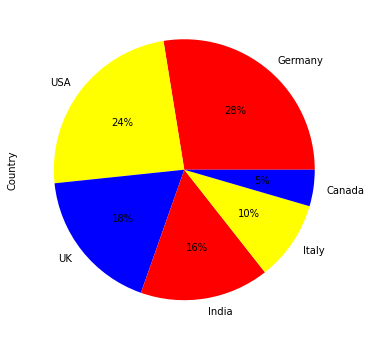

In [174]:
tweets_neu["Country"].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "blue"])

#### Convert label_id to numeric  as - {'neu' : 2, 'pos' : 0, 'neg' : 1} 

In [175]:

# Create the dictionary 
class_dictionary = {'neu' : 2, 'pos' : 0, 'neg' : 1} 
  
# Add a new column named 'Price' 
tweets_df['class'] = tweets_df['label_id'].map(class_dictionary) 

In [176]:
#Dropping label-id  column from main dataframe as it has been converted to class column as numeric
tweets_df = tweets_df.drop(["label_id"], axis=1)

In [177]:
# Check label (class in numeric) distribution - # 2 = Neutral, 0 = Positive  , 1 = Negative
tweets_df["class"].value_counts()  

1    12259
0     9983
2     7913
Name: class, dtype: int64

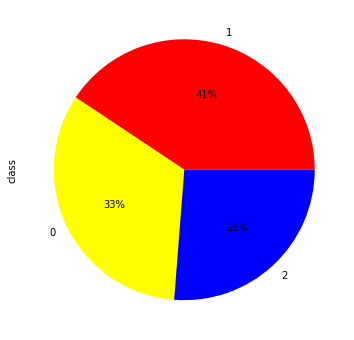

In [178]:
tweets_df["class"].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "blue"])

In [179]:
print(tweets_df.head(5))

             tweet_id SourceDataBase  ... Country  class
0  neu-GG-Tweet-11945          MySQL  ...  Canada      2
1  neu-GG-Tweet-11944          MySQL  ...  Canada      2
2  neu-GG-Tweet-11943          MySQL  ...  Canada      2
3  neu-GG-Tweet-11942          MySQL  ...  Canada      2
4  neu-GG-Tweet-11941          MySQL  ...  Canada      2

[5 rows x 10 columns]


#### Explore Negative tweet and its catergory ( column - Tweet-Class_category-Code)

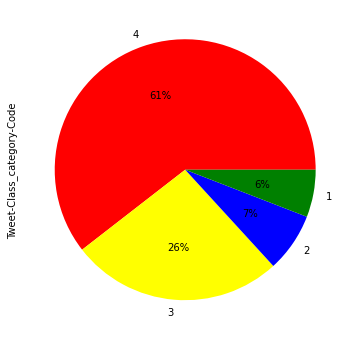

In [198]:
tweets_neg["Tweet-Class_category-Code"].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "blue","green"])

##### Explore distribution "no of twwets" (column - retweet_count) for each label

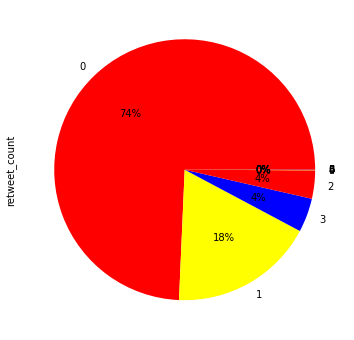

In [180]:
tweets_df["retweet_count"].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "blue"])

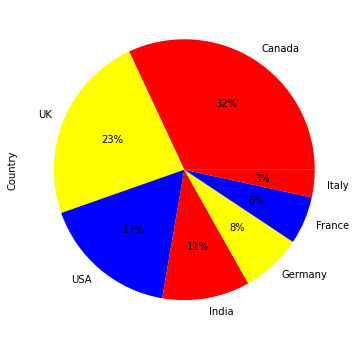

In [181]:
tweets_df["Country"].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "blue"])

In [182]:
tweets_df.columns

Index(['tweet_id', 'SourceDataBase', 'OS', 'Tweet-Class_category-Code',
       'Tweet_source', 'Tweeted-By', 'retweet_count', 'Tweet', 'Country',
       'class'],
      dtype='object')

In [183]:
#tweets_pos = tweets_df[(tweets_df.class.isin([1]))]
#tweets_df['Country'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "blue"])
#dff = tweets_df.groupby(["class"]).value_count()["Country"]
#dff

In [184]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30155 entries, 0 to 30255
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   tweet_id                   30155 non-null  object
 1   SourceDataBase             30155 non-null  object
 2   OS                         30155 non-null  object
 3   Tweet-Class_category-Code  30155 non-null  int64 
 4   Tweet_source               30155 non-null  object
 5   Tweeted-By                 30155 non-null  object
 6   retweet_count              30155 non-null  int64 
 7   Tweet                      30155 non-null  object
 8   Country                    30155 non-null  object
 9   class                      30155 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.5+ MB


In [185]:
dff

## Tweet pattern

### WordCloud of each class

##### word cloud is “an image composed of words used in a particular text or subject, in which the size of each word indicates its frequency or importance.”


In [186]:
#tweets_df["class"].value_counts()        # 2 = Neutral, 0 = Positive  , 1 = Negative

In [187]:
positive_tweets = ' '.join(tweets_df[tweets_df['class'] == 0]['Tweet'].str.lower())


In [188]:

neutral_tweets = ' ' .join(tweets_df[tweets_df['class'] == 2]['Tweet'].str.lower())

In [189]:
negative_tweets = ' '.join(tweets_df[tweets_df['class'] == 1]['Tweet'].str.lower())

In [190]:
# pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

Text(0.5, 1.0, 'Positive tweets Wordcloud')

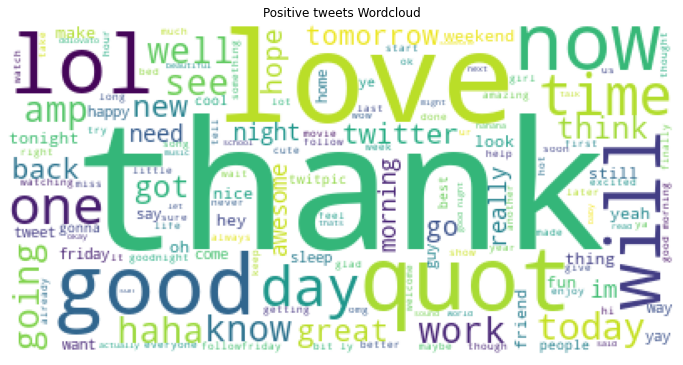

In [191]:


# "stop words", in simple terms it refers to the most common words in a language. 
# These are typically uninformative words, such as "the" or "and", for example, 
# that are thus removed during preprocessing in many Natural Language Processing (NLP) applications.
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(positive_tweets)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Positive tweets Wordcloud")

Text(0.5, 1.0, 'Negative tweets Wordcloud')

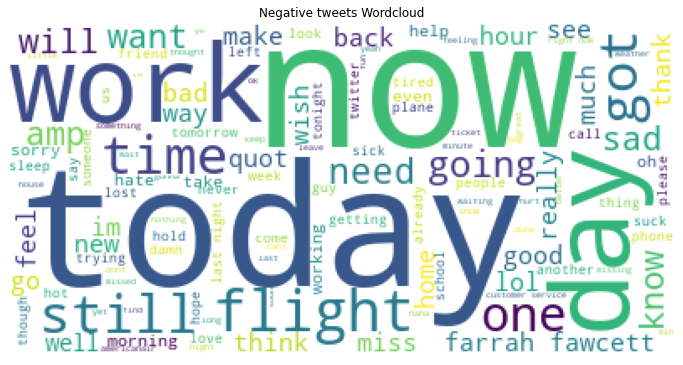

In [192]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(negative_tweets)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Negative tweets Wordcloud")

Text(0.5, 1.0, 'Neutral tweets Wordcloud')

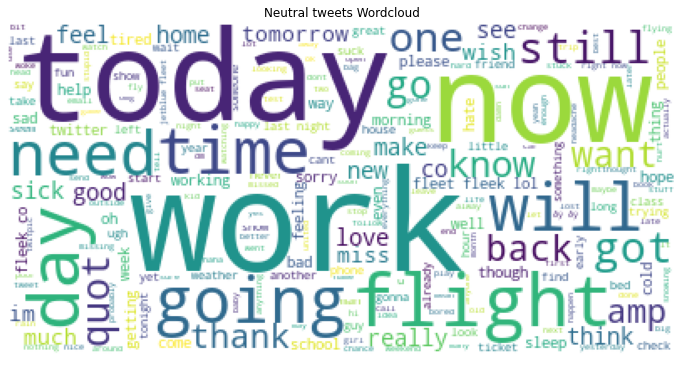

In [193]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(neutral_tweets)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Neutral tweets Wordcloud")

In [194]:
#Check null before splitting
columnsWiseMissingValue = find_missing_values_func(tweets_df) 
print(columnsWiseMissingValue)

Selected dataframe has 10 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


In [195]:
print(colored("Class distribution:", "yellow"))
print(tweets_df['class'].value_counts())

Class distribution:
1    12259
0     9983
2     7913
Name: class, dtype: int64


## Save First round preprocessing data

In [196]:
#Save first round cleaned tweets_df 
tweets_df.to_csv(outFolder+"/01_first_round_cleaned_tweets_df.csv", index = False)
print(colored("data saved", "green"))

data saved
